In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
coursera = pd.read_csv('/content/drive/MyDrive/PI03/Moocs/Coursera_courses.csv')
edx = pd.read_csv('/content/drive/MyDrive/PI03/Moocs/edx_courses.csv')
udemy = pd.read_csv('/content/drive/MyDrive/PI03/Moocs/udemy_courses.csv')
coursera_reviews = pd.read_csv('/content/drive/MyDrive/PI03/Moocs/Coursera_reviews.csv')

#EDA

Coursera

In [ ]:
coursera

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [ ]:
# Cantidad de nulos
coursera.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [ ]:
# Tipo de dato de cada columna
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [ ]:
# Breve pantallazo de los datos
desc = coursera.describe()
desc

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [ ]:
# Cantidad de nombres que se repites
cant = coursera['name'].value_counts()
cant.head(10)

Introduction to Psychology                                2
Machine Learning                                          1
Career 911: Your Future Job in Medicine and Healthcare    1
Introduction to Trading, Machine Learning & GCP           1
Python Programming: A Concise Introduction                1
The Modern World, Part Two: Global History since 1910     1
Understanding Plants - Part I: What a Plant Knows         1
Excel Fundamentals for Data Analysis                      1
Finanzas personales                                       1
English Composition I                                     1
Name: name, dtype: int64

In [ ]:
# Couta de mercado de instituciones que imparten cursos en porcentajes
cant_inst = coursera['institution'].value_counts().apply(lambda x: x / len(coursera) * 100)
cant_inst

University of Pennsylvania       6.902087
University of Michigan           4.975923
Duke University                  3.852327
Google Cloud                     3.531300
IBM                              2.889246
                                   ...   
EDHEC Business School            0.160514
INSEAD                           0.160514
Google - Spectrum Sharing        0.160514
New York Institute of Finance    0.160514
UCL School of Management         0.160514
Name: institution, Length: 134, dtype: float64

In [ ]:
# Cantidad de cursos de cada institucion
cant = coursera['institution'].value_counts()
cant.head(20)

University of Pennsylvania                    43
University of Michigan                        31
Duke University                               24
Google Cloud                                  22
IBM                                           18
Stanford University                           18
University of Illinois at Urbana-Champaign    17
University of Virginia                        17
Yale University                               17
DeepLearning.AI                               16
University of California, Irvine              15
Johns Hopkins University                      14
University of California, Davis               13
University of London                          12
Universiteit Leiden                           11
University of Colorado Boulder                10
University of California San Diego            10
Google                                         9
The University of Edinburgh                    8
University of Toronto                          8
Name: institution, d

coursera reviews

In [ ]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [ ]:
# Primer falencia con respecto a la cantidad de cursos que presenta el dataframe coursera
coursera_reviews['course_id'].nunique()

604

In [ ]:
coursera_reviews.isnull().sum()

reviews         1
reviewers       0
date_reviews    0
rating          0
course_id       0
dtype: int64

In [ ]:
coursera_reviews['reviews'].duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1454706     True
1454707     True
1454708     True
1454709     True
1454710     True
Name: reviews, Length: 1454711, dtype: bool

In [ ]:
# Cantidad de valores duplicados
coursera_reviews['reviews'].duplicated().sum()

996433

In [ ]:
promedio = 996433 / len(coursera_reviews['reviews']) * 100
print(f'porcentaje de datos duplicados en la columna reviews {round(promedio)}%')

porcentaje de datos duplicados en la columna reviews 68%


In [ ]:
coursera_reviews.drop_duplicates('reviews', inplace = True)

In [ ]:
# Cantidad de valores duplicados
coursera_reviews['reviews'].duplicated().sum()

0

In [ ]:
# Corroborando la cantidad de cursos que disponemos entre las dos columnas
comp = coursera.merge(coursera_reviews, on = 'course_id', how = 'outer' )
comp.nunique()

name               622
institution        134
course_url         623
course_id          623
reviews         458277
reviewers       260410
date_reviews      1892
rating               5
dtype: int64

In [ ]:
# Pasamos de 5 dimensiones a 8, en cantidad de filas pasamos de 1454711 en coursera_reviews y 623 en coursera a 1454730 con sus respectivas 8 dimensiones
comp.shape

(458297, 8)

In [ ]:
# Se duplicarion 19 valores porque el numero de filas aumento y no habia datos para rellenar las filas de dicha columna 
comp.duplicated(['reviews']).sum() 

19

In [ ]:
# Cantidad de reviews que posee cada reviewer
cant = comp['reviewers'].value_counts()
cant = cant.sort_values()
cant.tail(30)

By Jonathan G      79
By Daniel B        79
By Michael C       81
By David L         83
By Abhishek K      84
By Rahul S         84
By Mohamed A       85
By David A         87
By Rahul K         87
By Daniel C        88
By Mohammad A      91
By Muhammad S      94
By David H         94
By Amit K          95
By John M          95
By Ankit S         96
By Shubham S       97
By Daniel S       102
By Daniel M       109
By David C        114
By Aditya S       114
By David B        121
By Michael M      122
By Michael B      126
By David S        126
By Abhishek S     137
By David M        142
By Michael S      149
By Muhammad A     197
By Deleted A     1656
Name: reviewers, dtype: int64

In [ ]:
# Sin outliers, mas de dos por una cuestion de fracuencia y de participacion 
media_real = cant[(cant > 2) & (cant != cant.max())]
media_real.describe()

count    32030.000000
mean         6.008273
std          6.632155
min          3.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        197.000000
Name: reviewers, dtype: float64

In [ ]:
graf = media_real.drop_duplicates()

In [ ]:
graf

By Dr. H K G        3
By Vlad N           4
By Suryasree R      5
By Ronak S          6
By Atul P           7
                 ... 
By Michael B      126
By Abhishek S     137
By David M        142
By Michael S      149
By Muhammad A     197
Name: reviewers, Length: 96, dtype: int64

In [ ]:
dictt = media_real.tail(10) # Sin el principal reviewer dado que tiene una cuota de mercado del 74%

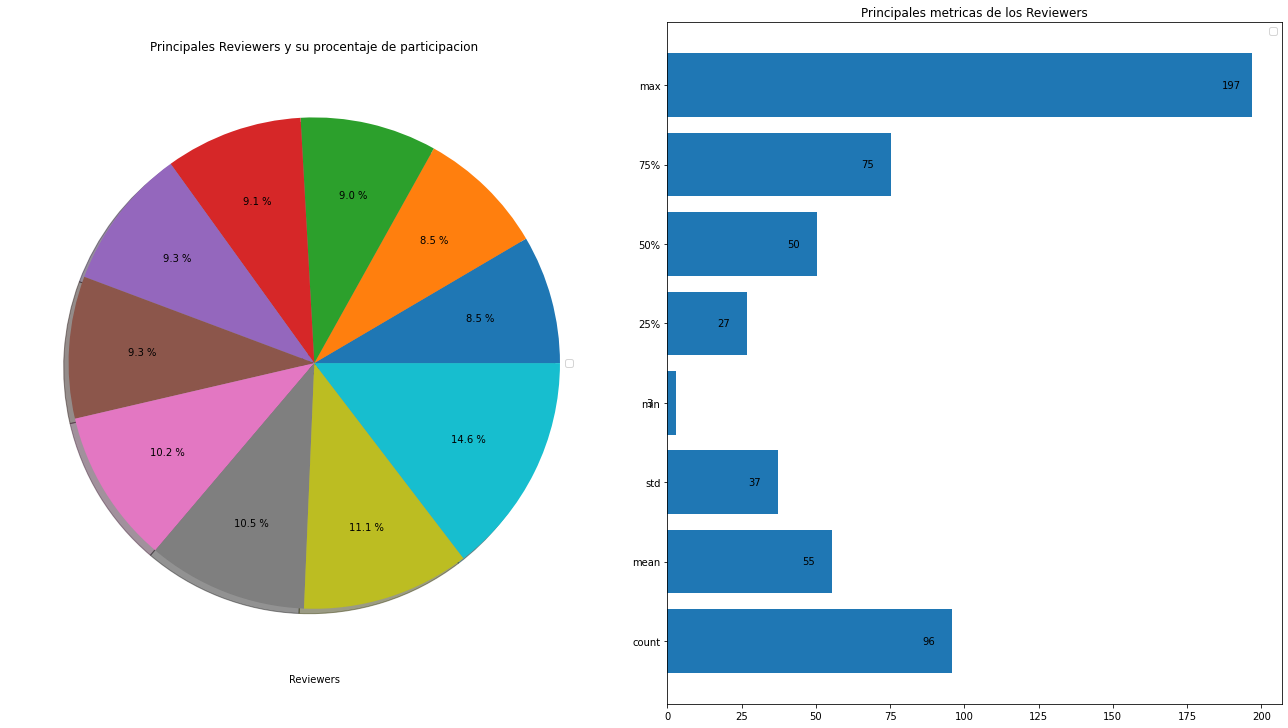

In [ ]:
fig, (ax, ax1) = plt.subplots(ncols = 2, nrows = 1, figsize = (18,10))
ax.pie(dictt , pctdistance= 0.7, rotatelabels = True, autopct= "%0.1f %%", shadow=True)
ax.set_xlabel('Reviewers')
ax.set_title('Principales Reviewers y su procentaje de participacion')
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))

ax1.barh(y = graf.describe().index, width = graf.describe().values)
plt.tight_layout()
ax1.set_title('Principales metricas de los Reviewers')
# Agregando una anotacion en horizontal (dejo las anotaciones originales)
rects = ax1.patches
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white

ax1.legend()
plt.show()

In [ ]:
# cursos con mayor cantidad de rating
df = coursera_reviews[['rating','course_id']]
df = df.groupby('course_id').sum()
df = df.sort_values('rating')
df.tail(15)

,rating
course_id,
gcp-fundamentals,22497
data-scientists-tools,23170
python-network-data,24769
deep-neural-network,25247
learn-korean,26861
what-is-datascience,30571
ai-for-everyone,31269
excel-essentials,32045
the-science-of-well-being,37481


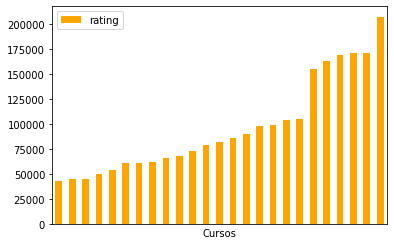

In [ ]:
# Grafico de los principales cursos de coursera
graph = df.tail(25).plot(kind = 'bar', color = 'orange', xlabel = 'Cursos')
plt.xticks([])
plt.show(graph)

In [ ]:
# Principales metricas
df.describe()

,rating
count,604.000000
mean,11311.700331
std,21761.883702
min,6.000000
25%,1707.000000
50%,4999.000000
75%,11250.000000
max,207179.000000


edx

In [ ]:
edx.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


In [ ]:
edx.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [ ]:
edx.shape

(975, 16)

In [ ]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [ ]:
# Cantidad de valores unicos
edx['course_syllabus'].nunique()

412

In [ ]:
# Porcentaje de la cantidad de nulos por columna
p = (edx.isnull().sum()) /len(edx) *100
p

title                  0.000000
summary                5.435897
n_enrolled            12.307692
course_type            0.000000
institution            0.000000
instructors            0.307692
Level                  0.000000
subject                0.000000
language               0.000000
subtitles              0.307692
course_effort          0.000000
course_length          0.000000
price                  0.000000
course_description     4.102564
course_syllabus       57.230769
course_url             0.000000
dtype: float64

In [ ]:
# Explorando la columna
edx['course_syllabus']

0      Welcome - We start with opportunities to meet ...
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
970                                                  NaN
971                                                  NaN
972    Textbook: Neuronal Dynamics - from single neur...
973    Module 1: Introduction to the SDGsProfessor Je...
974                                                  NaN
Name: course_syllabus, Length: 975, dtype: object

In [ ]:
# Viendo el tipo de informacion que brinda esta columna
edx['course_syllabus'][972]

'Textbook: Neuronal Dynamics - from single neurons to networks and models of cognition (W. Gerstner, W.M. Kistler, R. Naud and L. Paninski), Cambridge Univ. Press. 2014 online version: http://neuronaldynamics.epfl.ch/ The course will be based on Chapters 12 and 16-19. Overview of contents over 6 weeks: A) Associative Memory and Hopfield Model B) Attractor networks and spiking neurons C) Neuronal populations and mean-field theory D) Perception and cortical field models E) Decision making and competitive dynamics F) Synaptic Plasticity and learning Total duration and workload: 6 weeks of video lectures. Each weak comprises a series of 5-8 videos. Viewing time about 60-90 minutes per week. Self-learning time 90 minutes per week. Online exercises, quizzes, and a final exam.'

In [ ]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [ ]:
# Principales lenguajes
languaje = edx['language'].value_counts()
dic = dict(languaje)
dic

{'English': 777,
 'Español': 176,
 'Français': 7,
 'Italiano': 4,
 '中文': 4,
 'Português': 4,
 '日本語': 1,
 'اللغة العربية': 1,
 'Deutsch': 1}

<function matplotlib.pyplot.show(*args, **kw)>

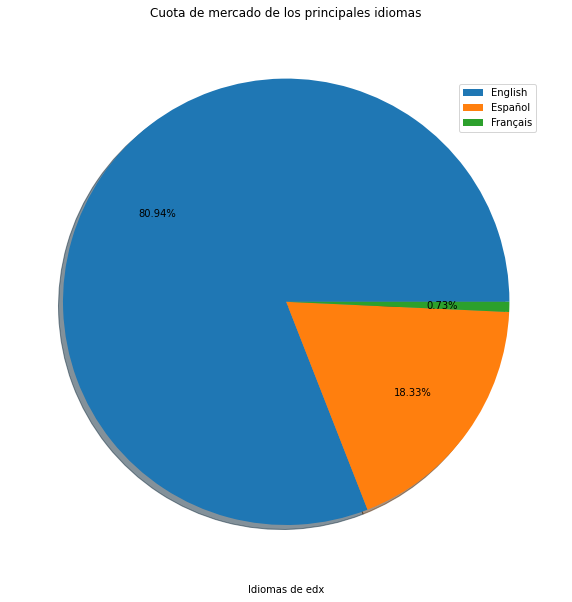

In [ ]:
# Principales lenguajes en porcentajes
fig, ax = plt.subplots(figsize = (10,12))
ax.pie(languaje.head(3) , pctdistance= 0.7, rotatelabels = True, autopct= "%0.2f%%", shadow=True)
ax.set_title('Cuota de mercado de los principales idiomas')
ax.set_xlabel('Idiomas de edx')
ax.legend(languaje.keys(), loc='upper left', bbox_to_anchor=(0.8, 0.9))
plt.show

In [ ]:
# Buscando cuales son los idiomas que mas se utilizan para subtitular los videos
edx['subtitles'].value_counts().head(5)

English             713
Español             157
English, 中文          21
English, Español     21
English, हिन्दी      10
Name: subtitles, dtype: int64

In [ ]:
# Principales idiomas para los subtitulos, medidos en porcentajes
p = (edx['subtitles'].value_counts()) /len(edx) *100
p.head(4)

English             73.128205
Español             16.102564
English, 中文          2.153846
English, Español     2.153846
Name: subtitles, dtype: float64

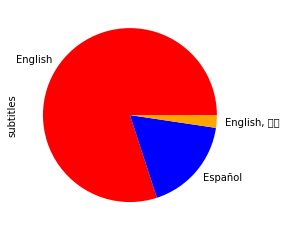

In [ ]:
# Graficando los principales idiomas utilizados para subtitulos
edx['subtitles'].value_counts().head(3).plot(kind= 'pie', colors = ['red', 'blue', 'orange'])

In [ ]:
# Observando como monetiza los cursos edx, en que basan su modelo
edx['price'].unique()

array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

In [ ]:
# Niveles a los cuales se dirige edx, habla mucho de su audiencia
edx['Level'].value_counts()

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

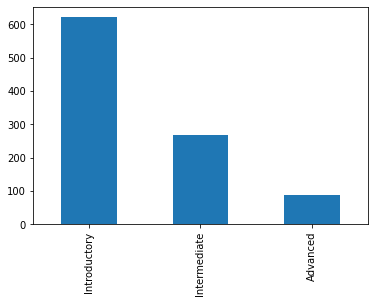

In [ ]:
# Graficando estos niveles y la cantidad de cursos que poseen, para asi visualizar mejor la diferencia (en cantidades) que presentan
val = edx['Level'].value_counts()
fig = plt.figure()
x1 = edx['Level'].value_counts().plot(kind = 'bar')

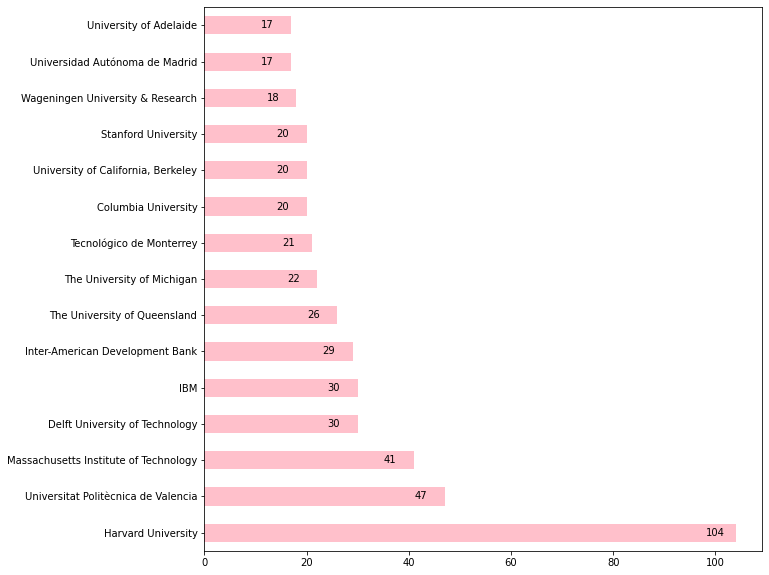

In [ ]:
# Principales instituciones que producen cursos para edx
fig = plt.figure(figsize = (10,10))
ax3 = edx['institution'].value_counts().head(15).plot(kind = 'barh', color = 'pink')
rects = ax3.patches
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
plt.show()

In [ ]:
# Aplicamos el metodo split() para separar esta columna en dos y apreciar mejor sus datos
columna = edx['course_length'].str.split(expand = True)
columna.columns = ['duration_num', 'duration_str']
edx = pd.concat ([edx, columna], axis = 1)

In [ ]:
# Sacamos metricas en relacion a la duracion de los cursos de edx
edx['duration_num'].astype(int).describe()

count    975.000000
mean       6.705641
std        3.150327
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       18.000000
Name: duration_num, dtype: float64

In [ ]:
# Vemos el marco temporal que duran los cursos de edx
edx['duration_str'].unique()

array(['Weeks'], dtype=object)

Udemy


In [ ]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
udemy.shape

(3678, 12)

In [ ]:
# Observamos si hay cursos duplicados
udemy['course_title'].duplicated().value_counts()

False    3663
True       15
Name: course_title, dtype: int64

In [ ]:
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
# Vemos un pantallazo del dataframe
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [ ]:
# Cantidad de cursos pagos y no pagos
pago = udemy['is_paid'].value_counts()
pago

True     3368
False     310
Name: is_paid, dtype: int64

In [ ]:
# Niveles que maneja udemy
level = udemy['level'].unique()
level

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

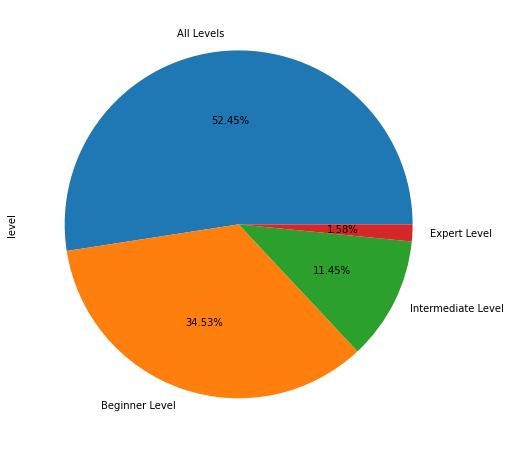

In [ ]:
# Porcentaje de los niveles de los cursos, podemos apreciar que brindan un acompañamiento "completo"
fig = plt.figure(figsize = (8,8))
cont = udemy['level'].value_counts().plot(kind = 'pie', autopct= "%0.2f%%")
plt.show()

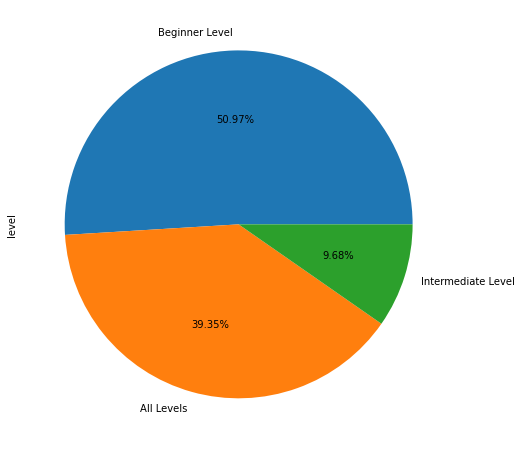

In [ ]:
# Niveles de los cursos gratuitos, representado en porcentajes
gratis = udemy[ (udemy['is_paid'] == False) & (udemy['level']) ]
fig = plt.figure(figsize = (8,8))
gratis['level'].value_counts().plot(kind = 'pie', autopct= "%0.2f%%")
plt.show()

In [ ]:
# Diferente gama de precios en Udemy
udemy['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135])

In [ ]:
# Descripcion con las principales metricas estadisticas
udemy['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [ ]:
# Porcentaje de valores en cero (0)
porcentaje = ((udemy['price'] == 0).sum()) / len(udemy) * 100 
print(f'Porcentaje de valores en cero es del {round(porcentaje)}%')

Porcentaje de valores en cero es del 8%


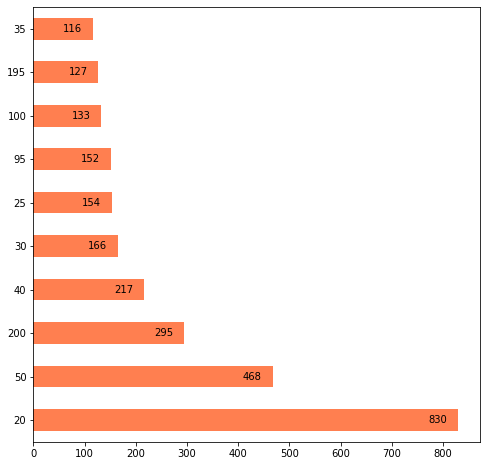

In [ ]:
# Aca vemos los precios que mas se repiten
# Creamos una nueva variable con un filtro para evitar sesgos con respecto al precio

new = udemy.drop(udemy[(udemy['price'] == 0)].index)
label = new['price'].value_counts().head(10)
fig, ax = plt.subplots(figsize = (8,8))
ax = new['price'].value_counts().head(10).plot(kind = 'barh', color = 'coral')
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'black')            # Change label color to white
plt.show()

In [ ]:
new['price'].describe()

count    3368.000000
mean       72.128860
std        60.214043
min        20.000000
25%        25.000000
50%        50.000000
75%       100.000000
max       200.000000
Name: price, dtype: float64

In [ ]:
udemy['num_subscribers'].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

In [ ]:
# Cantidad de subscriptores por curso, aca vemos los que poseen mayor popularidad
df = udemy[['num_subscribers','course_title']]
df = df.groupby('course_title').sum()
df = df.sort_values('num_subscribers')
df.tail(15)

,num_subscribers
course_title,
Web Development By Doing: HTML / CSS From Scratch,72932
Beginner Photoshop to HTML5 and CSS3,73110
Angular 4 (formerly Angular 2) - The Complete Guide,73783
Pianoforall - Incredible New Way To Learn Piano & Keyboard,75499
JavaScript: Understanding the Weird Parts,79612
Practical PHP: Master the Basics and Code Dynamic Websites,83737
Learn Javascript & JQuery From Scratch,84897
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours,86570
Web Design for Web Developers: Build Beautiful Websites!,98867


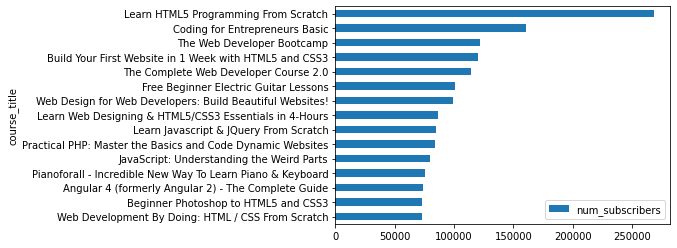

In [ ]:
# Graficamos los 15 cursos con mas popularidad
ax = df.tail(15).plot(kind = 'barh')
plt.show()

In [ ]:
# Observamos los principales sectores a los cuales se avoca su oferta educativa
udemy['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [ ]:
# Aca los vamos a representar en porcentajes
porcen = (udemy['subject'].value_counts()) / len(udemy) *100
porcen

Web Development        32.626427
Business Finance       32.490484
Musical Instruments    18.488309
Graphic Design         16.394780
Name: subject, dtype: float64

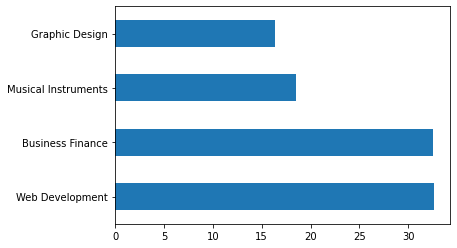

In [ ]:
porcen.plot(kind = 'barh')

In [ ]:
# Vemos la duracion de sus cursos
udemy['content_duration'].sort_values()

892      0.000000
116      0.133333
448      0.316667
984      0.450000
718      0.466667
          ...    
1214    68.500000
874     70.000000
561     71.500000
3141    76.500000
1658    78.500000
Name: content_duration, Length: 3678, dtype: float64

In [ ]:
# Mayor duracion de un curso
udemy['content_duration'].max()

78.5

In [ ]:
# Aplicamos un filtro logico para evitar sesgos, dado que a criterio personal un curso no dura menos de 1h
nn = udemy[udemy['content_duration'] >= 1] 
nn = nn['content_duration'].value_counts().sort_values()

In [ ]:
# Y terminamos recorriendo sus valores
nn.head()

66.5    1
42.0    1
43.0    1
47.0    1
27.5    1
Name: content_duration, dtype: int64

In [ ]:
# Viendo cuantas veces se repiten
nn.tail()

3.0    248
2.5    269
2.0    419
1.5    507
1.0    607
Name: content_duration, dtype: int64

In [ ]:
# Terminamos visualizando las principales metricas
nn.describe()

count     84.000000
mean      39.892857
std      104.676900
min        1.000000
25%        1.000000
50%        3.000000
75%       17.250000
max      607.000000
Name: content_duration, dtype: float64

## WORDCLOUD ##


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


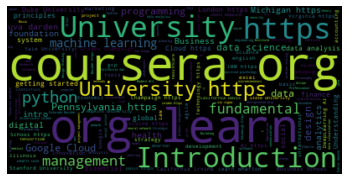

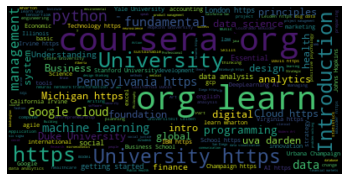

In [ ]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, '/content/drive/MyDrive/PI03/Moocs/Coursera_courses.csv')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Export to an image
wordcloud.to_file("coursera.png")

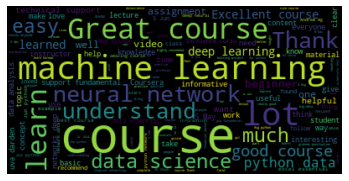

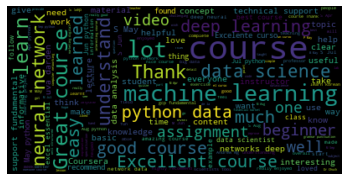

In [ ]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, '/content/drive/MyDrive/PI03/Moocs/Coursera_reviews.csv')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("courseraR1.png")

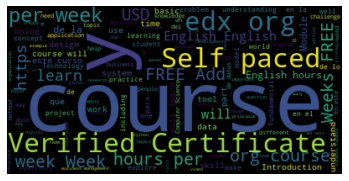

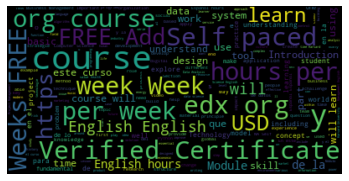

In [ ]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, '/content/drive/MyDrive/PI03/Moocs/edx_courses.csv')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("edx.png")


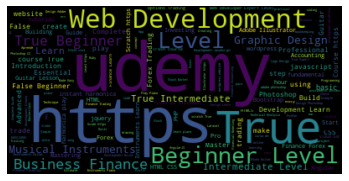

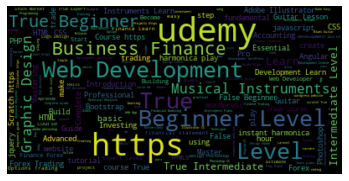

In [ ]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, '/content/drive/MyDrive/PI03/Moocs/udemy_courses.csv')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("udemy.png")